## The following project is to provide insights to US Housing Prices 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [20]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,dis_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 yrs,between 4 and 8
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 yrs and older,between 4 and 8
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 yrs,between 4 and 8
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 yrs,between 4 and 8
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 yrs,between 4 and 8


In [9]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Text(0, 0.5, 'Median Value($1000)')

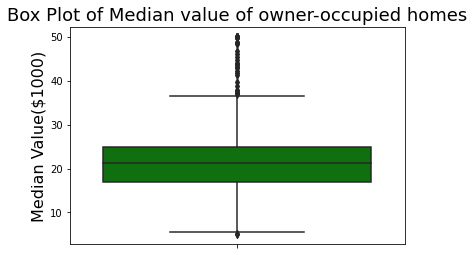

In [10]:
ax = sns.boxplot(y='MEDV',data=boston_df, color='green')
plt.title('Box Plot of Median value of owner-occupied homes', fontsize=18)
#plt.xlabel('Life Exp (years)', fontsize=16)
plt.ylabel('Median Value($1000)', fontsize=16)

The boxplot above will display the following values of minimum 5.0, maximum 50.0, median 21.2, first quartile 17.02, third quartile 25.0 of the median value of owner-occupied homes in $1000's.



Text(3.674999999999997, 0.5, 'Count')

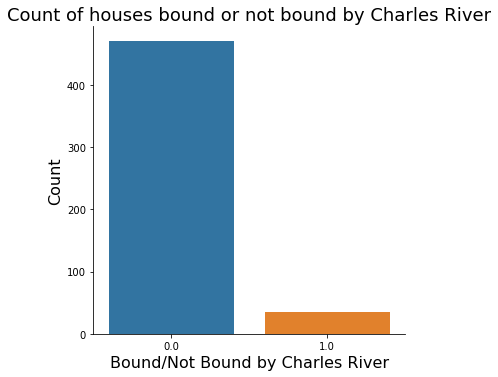

In [11]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title('Count of houses bound or not bound by Charles River', fontsize=18)
plt.xlabel('Bound/Not Bound by Charles River', fontsize=16)
plt.ylabel('Count', fontsize=16)

The histogram above shows more houses not bound by Charles river compared to houses bound by Charles river.



Text(0, 0.5, 'Median Value($1000)')

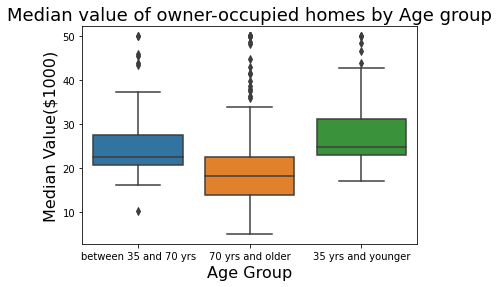

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 yrs and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 yrs'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 yrs and older'

ax = sns.boxplot(y='MEDV',x='age_group',data=boston_df)
plt.title('Median value of owner-occupied homes by Age group', fontsize=18)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Median Value($1000)', fontsize=16)

The boxplot above shows the Median value of owner-occupied houses whose age is 35 years or less are higher compared to houses whose age is between 35 and 70 years. And the median value for houses whose age is 70 years and above is lower compared to the other two age groups.



Text(0, 0.5, 'Non-retail business acres per town')

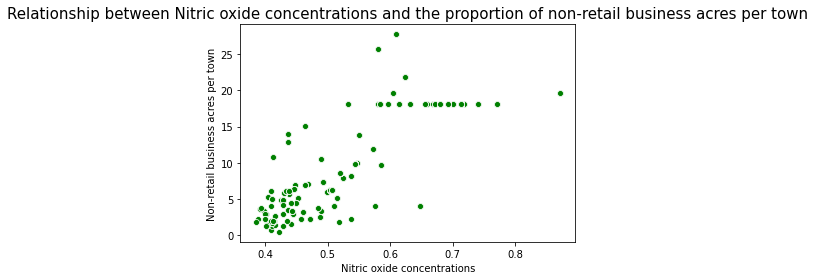

In [13]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color='green') 
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town', fontsize=15)
plt.xlabel('Nitric oxide concentrations', fontsize=10)
plt.ylabel('Non-retail business acres per town', fontsize=10)

The scatter plot above shows there is a positive linear relationship between Nitric oxide concentrations and non-retail business acres per town which means as the Nitric oxide concentrations increases, the non-retail business acres increases.



count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

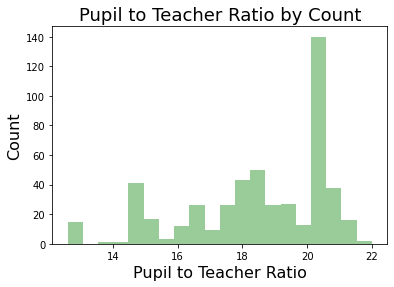

In [14]:
sns.distplot(boston_df['PTRATIO'], kde=False, color='green', bins=20)
plt.title('Pupil to Teacher Ratio by Count', fontsize=18)
plt.xlabel('Pupil to Teacher Ratio', fontsize=16)
plt.ylabel('Count', fontsize=16)

boston_df['PTRATIO'].describe()

The chart above shows the highest count for Pupil to Teacher ratio is between 20 and 21.




**Question:** Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [15]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')


LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [16]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

State the hypothesis

-   $H_0:$ µ1=µ2  ("there is no difference in median value of houses bounded by the Charles river and not")

-   $H_1:$ µ1≠µ2  ("there is a difference in median value of houses bounded by the Charles river and not")
    
**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that 
            there is a statistical difference in median value of houses based on the Charles river.


**Question:** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [17]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 yrs and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 yrs'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 yrs and older'

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 yrs and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 yrs']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 yrs and older']['MEDV'], 
                   center='mean')

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 yrs and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 yrs']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 yrs and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ
    
**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ which means there is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.


**Question** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [18]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

State the hypothesis:

-   $H_0:$  Proportion of non-retail business acres per town is not correlated with Nitric oxide concentrations
    
-   $H_1:$  Proportion of non-retail business acres per town is correlated with Nitric oxide concentrations
    
**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there exists a relationship between  non-retail business acres and Nitric oxide concentrations.


**Question** What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [19]:
boston_df.loc[(boston_df['DIS'] <= 4), 'dis_group'] = '4 and below'
boston_df.loc[(boston_df['DIS'] > 4)&(boston_df['DIS'] < 8), 'dis_group'] = 'between 4 and 8'
boston_df.loc[(boston_df['DIS'] >= 8), 'dis_group'] = '8 and above'

from statsmodels.formula.api import ols
lm = ols('MEDV ~ dis_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)


              df        sum_sq     mean_sq          F    PR(>F)
dis_group    2.0   1893.536633  946.768316  11.665661  0.000011
Residual   503.0  40822.758782   81.158566        NaN       NaN


State the Hypothesis:

-   $H_0: µ1 = µ2 = µ3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ
    
**Conclusion:** we will reject the null hypothesis since the p-value is less than 0.05 as there is significant evidence that at least one of the means differ which means there is impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes.
